In [101]:
import numpy as np 
import pandas as pd 
import os


In [105]:
df = pd.read_csv("D:\column_2C_weka.csv")
df.head(4)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [108]:
df["class"].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [109]:
df["class"]= [1 if each == "Normal" else 0 for each in df["class"]]
df["class"].value_counts()

class
0    210
1    100
Name: count, dtype: int64

In [113]:
y = df["class"].values
x_data = df.drop(["class"],axis=1)
x_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [114]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.172453,0.078237,0.117940,0.119956,0.255425,0.025148
1,0.116655,0.049160,0.083970,0.093236,0.292047,0.036365
2,0.185964,0.077459,0.142342,0.134245,0.272446,0.017523
3,0.187046,0.083126,0.128886,0.129660,0.262864,0.051838
4,0.141459,0.048208,0.091656,0.118992,0.277529,0.044173
...,...,...,...,...,...,...
305,0.137248,0.057437,0.109539,0.105551,0.299131,0.015858
306,0.151291,0.073975,0.093758,0.103057,0.291955,0.024761
307,0.168772,0.078569,0.133213,0.115944,0.318269,0.019437
308,0.131077,0.045976,0.122535,0.110842,0.301684,0.026240


In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state = 30)
y_train

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1], dtype=int64)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

accuracy is:  0.7935483870967742


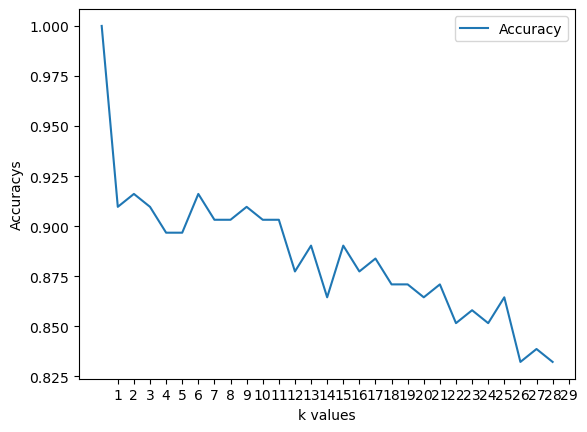

In [128]:
prediction = knn.predict(x_test)
print('accuracy is: ',knn.score(x_test,y_test))
accuracys = []
interval = np.arange(1, 30)
for i in interval:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    accuracys.append(knn.score(x_train, y_train))
import matplotlib.pyplot as plt
plt.plot (accuracys, label = 'Accuracy')
plt.xlabel('k values')
plt.ylabel('Accuracys')
plt.legend()
plt.xticks(interval)
plt.show()